In [1]:
import argparse
import midi
import os

from constants import *
from dataset import load_all
from generate import write_file, generate
from play_music_util import play_music

import pygame
import base64

from playsound import playsound
import numpy as np

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import math
import time
from IPython import display
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import optim
%matplotlib inline

In [3]:
# styles[0] = 'data/test'
styles[0]

['data/test']

In [4]:
print('Loading data')
train_data, train_labels = load_all(styles, BATCH_SIZE, SEQ_LEN)

Loading data


In [5]:
train_data[0].shape

(10, 128, 48, 3)

In [6]:
for i in range(3):
    print(train_data[i].shape)

(10, 128, 48, 3)
(10, 128, 48, 3)
(10, 128, 16)


In [7]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [8]:
from model import Generator, iterate_minibatches, compute_loss, train

In [9]:
generator = Generator()

In [10]:
X_tr = train_data[0][:-1]
X_te = train_data[0][-1:]
y_tr = train_labels[0][:-1]
y_te = train_labels[0][-1:]

In [11]:
X_tr.shape, X_te.shape

((9, 128, 48, 3), (1, 128, 48, 3))

Epoch 2 of 3 took 71.368s
current train loss: 0.6208244562149048
current val loss: 0.5186396837234497


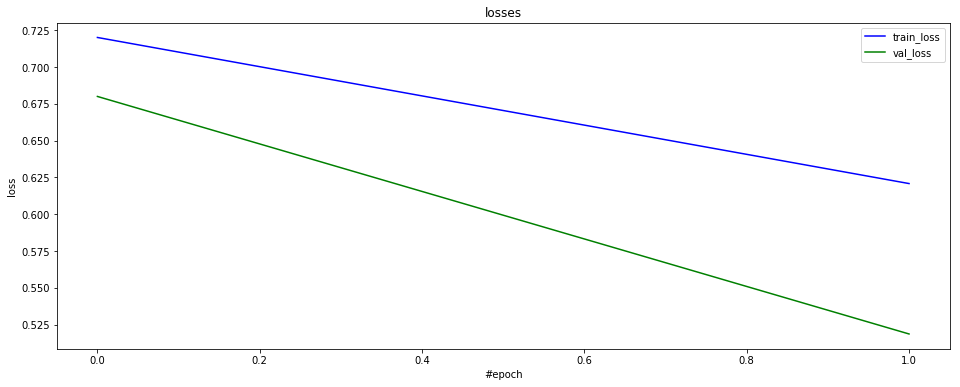

2it [00:50, 25.35s/it]

In [ ]:
generator, epoch_history = train(generator, X_tr, X_te, y_tr, y_te, batchsize=1, n_epochs = 10)

## Save/load the model

In [10]:
from model import Generator, iterate_minibatches, compute_loss, train
# torch.save(generator.state_dict(), os.path.join(OUT_DIR, 'model_canonical'))
the_model = Generator()
the_model.load_state_dict(torch.load(os.path.join(OUT_DIR, 'model_canonical')))

In [11]:
# dummy_note = Variable(torch.Tensor(train_data[0]))
# chosen = Variable(torch.Tensor(train_data[1]))

# # output = generator.forward(dummy_note, chosen)
# output = the_model.forward(dummy_note, chosen)

# print('dummy_time_features :', output.shape)
# output[0][0][3], output2[0][0][3]

# Canonical

In [12]:
write_file('output/canonical_test', generate(the_model, 4))

  0%|          | 0/64 [00:00<?, ?it/s]

Generating with no styles:


100%|██████████| 64/64 [01:17<00:00,  1.21s/it]

Writing file out/samples/output/canonical_test_0.mid


In [13]:
midi_file = 'out/samples/output/canonical_test_0.mid'
play_music(midi_file)

Music file out/samples/output/canonical_test_0.mid loaded!
